# Milestone 3

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import sqlite3
import csv

## 0: Import Data

In [2]:
conn = sqlite3.connect('../milestone2/FORM13F.db')
cursor = conn.cursor()
df_info = pd.read_sql(f"SELECT * FROM INFOTABLE_2024_Q3;", conn)
df_summary = pd.read_sql(f"SELECT * FROM SUMMARYPAGE_2024_Q3;", conn)
df_cover = pd.read_sql(f"SELECT * FROM COVERPAGE_2024_Q3;", conn)
conn.close()

In [3]:
df_info.head()

,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE
0,0002035951-24-000001,105173078,ABBOTT LABS,COM,002824100,None,238370,2294,SH,None,SOLE,None,2294,0,0
1,0002035951-24-000001,105173079,SCHWAB STRATEGIC TR,FUNDAMENTAL US S,808524763,None,413887,7536,SH,None,SOLE,None,7536,0,0
2,0002035951-24-000001,105173080,CISCO SYS INC,COM,17275R102,None,616954,12986,SH,None,SOLE,None,12986,0,0
3,0002035951-24-000001,105173081,DEERE & CO,COM,244199105,None,422202,1130,SH,None,SOLE,None,1130,0,0
4,0002035951-24-000001,105173082,MERCK & CO INC,COM,58933Y105,None,254362,2055,SH,None,SOLE,None,2055,0,0


## 1: Data Cleaning and Augmentation


#### Remove rows from Infotable that report "principal amount"

In [4]:
df_info = df_info[df_info['SSHPRNAMTTYPE'] == 'SH']

#### Merge Summary Page with Cover Page

In [5]:
df_investor = df_cover.merge(df_summary, how='inner', on='ACCESSION_NUMBER')

#### City Information

In [6]:
df_investor.columns.values

array(['ACCESSION_NUMBER', 'REPORTCALENDARORQUARTER', 'ISAMENDMENT',
       'AMENDMENTNO', 'AMENDMENTTYPE', 'CONFDENIEDEXPIRED',
       'DATEDENIEDEXPIRED', 'DATEREPORTED', 'REASONFORNONCONFIDENTIALITY',
       'FILINGMANAGER_NAME', 'FILINGMANAGER_STREET1',
       'FILINGMANAGER_STREET2', 'FILINGMANAGER_CITY',
       'FILINGMANAGER_STATEORCOUNTRY', 'FILINGMANAGER_ZIPCODE',
       'REPORTTYPE', 'FORM13FFILENUMBER', 'CRDNUMBER', 'SECFILENUMBER',
       'PROVIDEINFOFORINSTRUCTION5', 'ADDITIONALINFORMATION',
       'OTHERINCLUDEDMANAGERSCOUNT', 'TABLEENTRYTOTAL', 'TABLEVALUETOTAL',
       'ISCONFIDENTIALOMITTED'], dtype=object)

#### Create a new table with statistical information about the securities held by each investor

In [7]:
df_info.head()

,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE
0,0002035951-24-000001,105173078,ABBOTT LABS,COM,002824100,None,238370,2294,SH,None,SOLE,None,2294,0,0
1,0002035951-24-000001,105173079,SCHWAB STRATEGIC TR,FUNDAMENTAL US S,808524763,None,413887,7536,SH,None,SOLE,None,7536,0,0
2,0002035951-24-000001,105173080,CISCO SYS INC,COM,17275R102,None,616954,12986,SH,None,SOLE,None,12986,0,0
3,0002035951-24-000001,105173081,DEERE & CO,COM,244199105,None,422202,1130,SH,None,SOLE,None,1130,0,0
4,0002035951-24-000001,105173082,MERCK & CO INC,COM,58933Y105,None,254362,2055,SH,None,SOLE,None,2055,0,0


In [8]:
df_info['SSHPRNAMTTYPE'].value_counts()

SSHPRNAMTTYPE
SH    3247099
Name: count, dtype: int64

In [9]:
df_info['SSHPRNAMT'] = df_info['SSHPRNAMT'].astype(float)
df_info['SSHPRNAMT'].head()

0     2294.0
1     7536.0
2    12986.0
3     1130.0
4     2055.0
Name: SSHPRNAMT, dtype: float64

In [10]:
df_info['SSHPRNAMT'].describe()

count    3.247099e+06
mean     2.424949e+05
std      2.357349e+07
min      0.000000e+00
25%      6.410000e+02
50%      7.166000e+03
75%      4.541600e+04
max      4.197289e+10
Name: SSHPRNAMT, dtype: float64

In [11]:
df_info.sort_values(by='SSHPRNAMT', ascending=False).head(n=15)

,ACCESSION_NUMBER,INFOTABLE_SK,NAMEOFISSUER,TITLEOFCLASS,CUSIP,FIGI,VALUE,SSHPRNAMT,SSHPRNAMTTYPE,PUTCALL,INVESTMENTDISCRETION,OTHERMANAGER,VOTING_AUTH_SOLE,VOTING_AUTH_SHARED,VOTING_AUTH_NONE
446706,0001104659-24-089646,104541249,Xchange Tec. Inc,SPONSORED ADS,74738J300,None,55264,4.197289e+10,SH,None,DFND,None,41972885300,0,0
1501826,0000894189-24-004736,103700086,INDONESIAN RUPIAH,Cash - Foreign,00CASHIDR,None,198990,3.258467e+09,SH,None,SOLE,None,198990,0,0
1213344,0001104659-24-088892,103960766,NVIDIA CORPORATION,COM,67066G104,None,251565316870,2.036307e+09,SH,None,SOLE,None,0,0,2036306596
847452,0001011438-24-000458,104586018,LUCID GROUP INC,COM,549498103,None,3587967778,1.374700e+09,SH,None,SOLE,None,1374700298,0,0
1220964,0001104659-24-088892,103949814,APPLE INC,COM,037833100,None,265483948650,1.260488e+09,SH,None,SOLE,None,0,0,1260487839
693104,0000093751-24-000681,104544486,NVIDIA CORPORATION,COM,67066G104,None,121253117581,9.814887e+08,SH,None,DFND,"10,11,12,19,2,20,299,5,6,8",549495770,19482081,412510878
1422482,0000315066-24-001900,103670241,NVIDIA CORPORATION,COM,67066G104,None,92733183170,7.506329e+08,SH,None,DFND,1,749253363,0,1379494
1210709,0001104659-24-088892,103949185,AMAZON COM INC,COM,023135106,None,140302809020,7.260171e+08,SH,None,SOLE,None,0,0,726017123
1102400,0001086364-24-008417,104069048,NVIDIA CORPORATION,COM,67066G104,None,81016397038,6.557908e+08,SH,None,SOLE,21,655790813,0,0
1215470,0001104659-24-088892,103961958,MICROSOFT CORP,COM,594918104,None,287437549672,6.431090e+08,SH,None,SOLE,None,0,0,643108960


In [63]:
null_count = df_info['CUSIP'].isnull().sum()
print("Null count: ", null_count)
print("Total count: ", len(df_info))

Null count:  0
Total count:  3244654


#### Drop rows with incorrect values

In [12]:
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0001104659-24-089646']
df_info = df_info[df_info['ACCESSION_NUMBER'] != '0000894189-24-004736']

In [13]:
3587967778/1.374700e+09 # LUCID GROUP INC

2.61000056594166

In [14]:
251565316870/2.036307e+09 # NVIDIA

123.53997548994332

In [15]:
55264/4.197289e+10	# Xchange Tec. Inc

1.3166593961006736e-06

In [16]:
287437549672/6.431090e+08

446.9499722006689

In [17]:
df_info['SSHPRNAMT'] = df_info['SSHPRNAMT'].astype(float)

In [18]:
s = df_info.groupby(by="ACCESSION_NUMBER")['VALUE'].mean()
s = s.rename("MEAN VALUE")
df_stats = s.to_frame()

In [19]:
df_stats['MIN VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].min()
df_stats['MAX VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].max()
df_stats['STD VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].std()
df_stats['25% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.25)
df_stats['50% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].median()
df_stats['75% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.75)
df_stats['10% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.10)
df_stats['90% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.90)
df_stats['99% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.99)
df_stats['01% VALUE'] = df_info.groupby(by='ACCESSION_NUMBER')['VALUE'].quantile(q = 0.01)

In [20]:
df_stats['MEAN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].mean()
df_stats['MIN SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].min()
df_stats['MAX SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].max()
df_stats['STD SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].std()
df_stats['25% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.25)
df_stats['50% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].median()
df_stats['75% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.75)
df_stats['10% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.10)
df_stats['90% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.90)
df_stats['99% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.99)
df_stats['01% SHAMT'] = df_info.groupby(by='ACCESSION_NUMBER')['SSHPRNAMT'].quantile(q = 0.01)

In [21]:
df_stats = df_stats.reset_index()

In [22]:
df_stats.head()

,ACCESSION_NUMBER,MEAN VALUE,MIN VALUE,MAX VALUE,STD VALUE,25% VALUE,50% VALUE,75% VALUE,10% VALUE,90% VALUE,...,MIN SHAMT,MAX SHAMT,STD SHAMT,25% SHAMT,50% SHAMT,75% SHAMT,10% SHAMT,90% SHAMT,99% SHAMT,01% SHAMT
0,0000004962-24-000057,5.207895e+08,190081,1041388913,7.362388e+08,2.604898e+08,520789497.0,7.810892e+08,104309964.2,9.372690e+08,...,134905.0,157786199.0,1.114763e+08,39547728.5,78960552.0,1.183734e+08,15900034.4,142021069.6,1.562097e+08,1711417.94
1,0000004977-24-000143,2.789729e+07,35440,106909102,5.268832e+07,1.256060e+06,2322301.5,2.896353e+07,523688.2,7.573087e+07,...,130324.0,3636364.0,1.666427e+06,267179.5,1260721.0,2.565574e+06,185066.2,3208048.0,3.593532e+06,135798.22
2,0000005272-24-000086,2.954643e+09,1118415,8567209880,4.862855e+09,1.483598e+08,295601139.0,4.431406e+09,60014959.8,6.912888e+09,...,36478.0,294203636.0,1.694675e+08,679509.5,1322541.0,1.477631e+08,293690.6,235627417.0,2.883460e+08,62199.26
3,0000007195-24-000004,1.526741e+06,202033,5546619,1.155534e+06,6.461888e+05,1325774.0,1.960925e+06,451759.9,2.846288e+06,...,426.0,36587.0,7.193199e+03,2348.5,4027.5,8.275750e+03,952.8,15364.0,3.183125e+04,598.89
4,0000007195-24-000005,1.520756e+06,200605,7875282,1.406019e+06,5.326415e+05,1192257.0,1.831708e+06,386991.6,2.972075e+06,...,429.0,63747.0,1.035140e+04,3273.0,6198.0,1.217500e+04,1495.4,23875.0,4.138884e+04,545.30


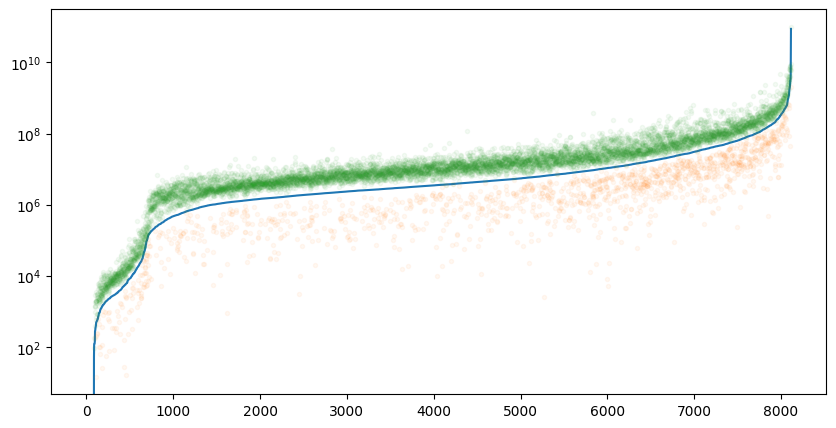

In [23]:
df_stats_sorted = df_stats.sort_values(by="MEAN VALUE")
x = np.arange(len(df_stats_sorted))
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x, df_stats_sorted['MEAN VALUE'])
ax.plot(x, df_stats_sorted['MEAN VALUE'] - df_stats_sorted['STD VALUE'],'.', alpha=0.05)
ax.plot(x, df_stats_sorted['MEAN VALUE'] + df_stats_sorted['STD VALUE'],'.', alpha=0.05)
ax.set_yscale("log")

#### United States Indicator

In [24]:
state_df = pd.read_csv("../data/state_list.csv")
state_set = set(list(state_df['Abbreviation']))
def UnitedStatesIndicator(x):
    return (x in state_set) # check if the location is in the US based on the state abbreviation
df_investor['US_Indicator'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(UnitedStatesIndicator)

#### Get full Country/State Name

In [25]:
# Initialize an empty dictionary
state_dict = {}
# Open the CSV file
with open('../data/state_country_abbreviations.csv', mode='r') as file:
    reader = csv.reader(file,skipinitialspace = True)
    # Iterate through the rows in the file
    for row in reader:
        # Assign the first column as the key and the second column as the value
        state_dict[row[0]] = row[1]
        
def get_country_state(x):
    try: return state_dict[x]
    except KeyError: return np.nan
    
df_investor['State_Country_Full'] = df_investor['FILINGMANAGER_STATEORCOUNTRY'].apply(get_country_state)

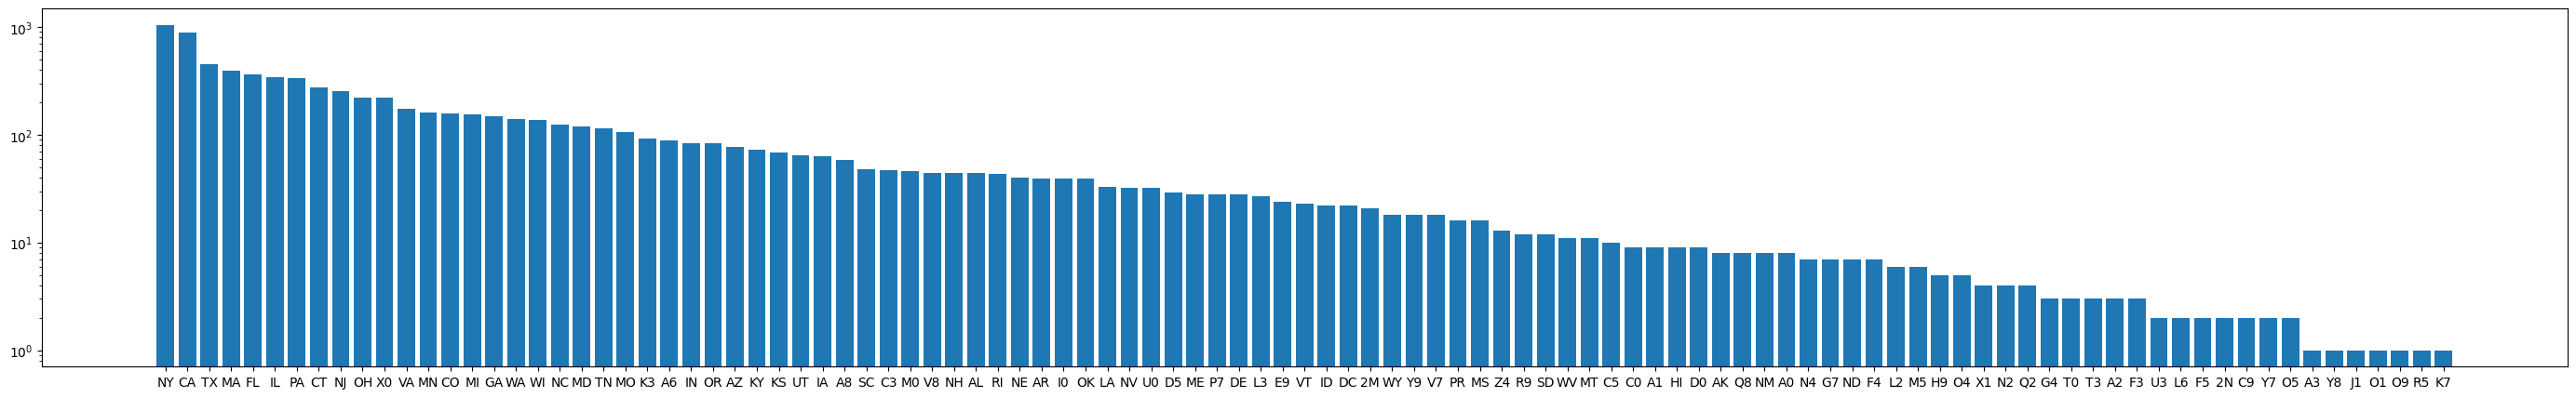

In [26]:
fig, ax = plt.subplots(1,1,figsize=(35,5))
ax.bar(df_investor['FILINGMANAGER_STATEORCOUNTRY'].value_counts().index,df_investor['FILINGMANAGER_STATEORCOUNTRY'].value_counts().values)
ax.set_yscale("log")

In [27]:
df_us = df_investor[df_investor['US_Indicator'] == True]

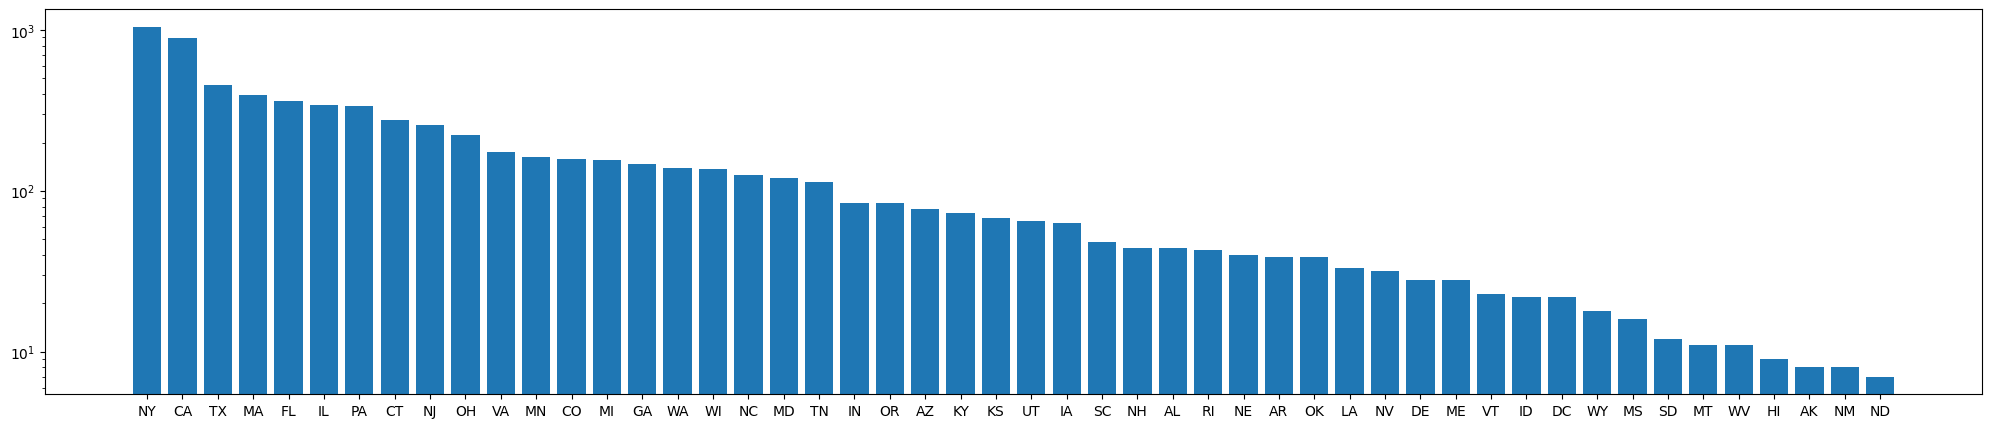

In [28]:
fig, ax = plt.subplots(1,1,figsize=(25,5))
ax.bar(df_us['FILINGMANAGER_STATEORCOUNTRY'].value_counts().index,df_us['FILINGMANAGER_STATEORCOUNTRY'].value_counts().values)
ax.set_yscale("log")

### State GDP

In [29]:
df_state_gdp = pd.read_csv("../data/state-gdp.csv")
df_state_gdp.columns.values

array(['State', 'Abbreviation', 'Region', '2022_MM', '2023_MM',
       '2023_Q4_Seasonally_Adjusted_MM', '2024_Q1_Seasonall_Adjusted_MM',
       '2024_Q2_Seasonall_Adjusted_MM',
       '2023_Percent_Change_From_Preceding_Period',
       '2024_Q1_Percent_Change_From_Preceding_Period',
       '2024_Q2_Percent_Change_From_Preceding_Period'], dtype=object)

In [30]:
df_ = df_investor['FILINGMANAGER_STATEORCOUNTRY'].value_counts().to_frame().reset_index()
df_

,FILINGMANAGER_STATEORCOUNTRY,count
0,NY,1048
1,CA,887
2,TX,457
3,MA,394
4,FL,364
...,...,...
100,J1,1
101,O1,1
102,O9,1
103,R5,1


In [31]:
df_state_gdp =df_state_gdp.merge(right=df_, how='inner',left_on = 'Abbreviation',right_on='FILINGMANAGER_STATEORCOUNTRY')

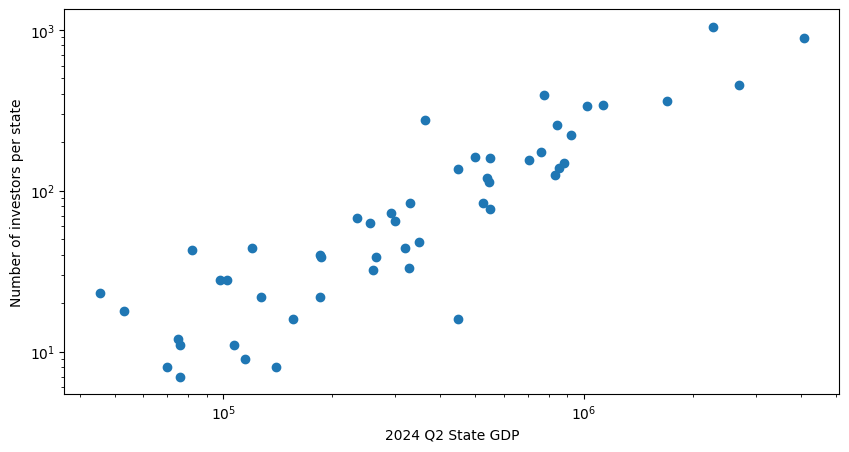

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(df_state_gdp['2024_Q2_Seasonall_Adjusted_MM'], df_state_gdp['count'])
ax.set_xscale('log')
ax.set_xlabel("2024 Q2 State GDP")
ax.set_ylabel("Number of investors per state")
ax.set_yscale('log')

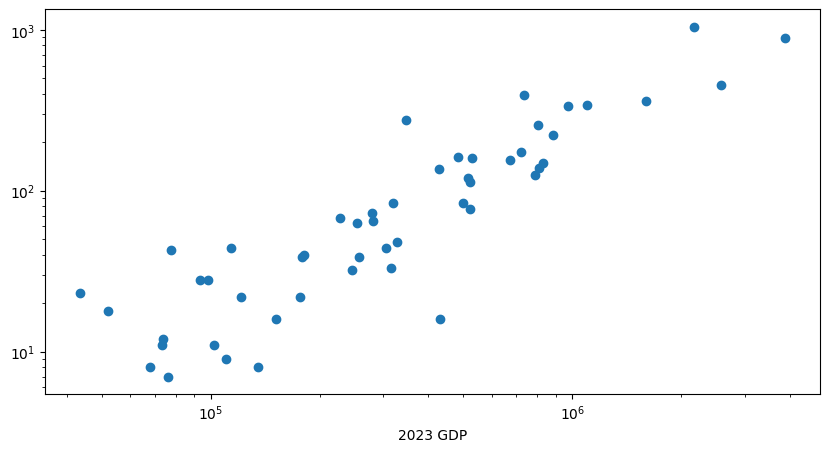

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(df_state_gdp['2023_MM'], df_state_gdp['count'])
ax.set_xlabel("2023 GDP")
ax.set_xscale('log')
ax.set_yscale('log')

In [34]:
df_state_gdp[['2024_Q2_Seasonall_Adjusted_MM','Abbreviation']]

,2024_Q2_Seasonall_Adjusted_MM,Abbreviation
0,363417,CT
1,97872,ME
2,776147,MA
3,120163,NH
4,81911,RI
5,45432,VT
6,102401,DE
7,184916,DC
8,539232,MD
9,841417,NJ


In [65]:
df_us2 = df_us.merge(
    right=df_state_gdp, 
    how='inner', 
    left_on = 'FILINGMANAGER_STATEORCOUNTRY', 
    right_on='Abbreviation')

In [66]:
df_us2.columns.values

array(['ACCESSION_NUMBER', 'REPORTCALENDARORQUARTER', 'ISAMENDMENT',
       'AMENDMENTNO', 'AMENDMENTTYPE', 'CONFDENIEDEXPIRED',
       'DATEDENIEDEXPIRED', 'DATEREPORTED', 'REASONFORNONCONFIDENTIALITY',
       'FILINGMANAGER_NAME', 'FILINGMANAGER_STREET1',
       'FILINGMANAGER_STREET2', 'FILINGMANAGER_CITY',
       'FILINGMANAGER_STATEORCOUNTRY_x', 'FILINGMANAGER_ZIPCODE',
       'REPORTTYPE', 'FORM13FFILENUMBER', 'CRDNUMBER', 'SECFILENUMBER',
       'PROVIDEINFOFORINSTRUCTION5', 'ADDITIONALINFORMATION',
       'OTHERINCLUDEDMANAGERSCOUNT', 'TABLEENTRYTOTAL', 'TABLEVALUETOTAL',
       'ISCONFIDENTIALOMITTED', 'US_Indicator', 'State_Country_Full',
       'State', 'Abbreviation', 'Region', '2022_MM', '2023_MM',
       '2023_Q4_Seasonally_Adjusted_MM', '2024_Q1_Seasonall_Adjusted_MM',
       '2024_Q2_Seasonall_Adjusted_MM',
       '2023_Percent_Change_From_Preceding_Period',
       '2024_Q1_Percent_Change_From_Preceding_Period',
       '2024_Q2_Percent_Change_From_Preceding_Period',
   

In [67]:
df_us2['ISCONFIDENTIALOMITTED'].value_counts()

ISCONFIDENTIALOMITTED
N    4655
Y      97
Name: count, dtype: int64

#### Merge `df_stats` with `df_us2`

In [68]:
df_us2 = df_us2.merge(right=df_stats, how='inner',on='ACCESSION_NUMBER')

In [69]:
df_us2.columns.values

array(['ACCESSION_NUMBER', 'REPORTCALENDARORQUARTER', 'ISAMENDMENT',
       'AMENDMENTNO', 'AMENDMENTTYPE', 'CONFDENIEDEXPIRED',
       'DATEDENIEDEXPIRED', 'DATEREPORTED', 'REASONFORNONCONFIDENTIALITY',
       'FILINGMANAGER_NAME', 'FILINGMANAGER_STREET1',
       'FILINGMANAGER_STREET2', 'FILINGMANAGER_CITY',
       'FILINGMANAGER_STATEORCOUNTRY_x', 'FILINGMANAGER_ZIPCODE',
       'REPORTTYPE', 'FORM13FFILENUMBER', 'CRDNUMBER', 'SECFILENUMBER',
       'PROVIDEINFOFORINSTRUCTION5', 'ADDITIONALINFORMATION',
       'OTHERINCLUDEDMANAGERSCOUNT', 'TABLEENTRYTOTAL', 'TABLEVALUETOTAL',
       'ISCONFIDENTIALOMITTED', 'US_Indicator', 'State_Country_Full',
       'State', 'Abbreviation', 'Region', '2022_MM', '2023_MM',
       '2023_Q4_Seasonally_Adjusted_MM', '2024_Q1_Seasonall_Adjusted_MM',
       '2024_Q2_Seasonall_Adjusted_MM',
       '2023_Percent_Change_From_Preceding_Period',
       '2024_Q1_Percent_Change_From_Preceding_Period',
       '2024_Q2_Percent_Change_From_Preceding_Period',
   

#### Investor City

In [70]:
df_us2['FILINGMANAGER_CITY'] = df_us2['FILINGMANAGER_CITY'].str.lower()

In [71]:
df_us2['FILINGMANAGER_CITY'].value_counts()

FILINGMANAGER_CITY
new york              824
boston                192
chicago               179
san francisco         157
houston               109
                     ... 
sante fe                1
saint paul              1
indian rocks beach      1
kokomo                  1
kerrville               1
Name: count, Length: 1276, dtype: int64

In [72]:
# df_us2['FILINGMANAGER_STATEORCOUNTRY'].value_counts()

In [73]:
print(len(df_us2))

7051


In [74]:
# df_us2 = df_us2.loc[(df_us2 != 0).all(axis=1)]

In [75]:
print(len(df_us2))

7051


In [76]:
from census import Census
import us  # A helpful package for state abbreviation
import os

## 2: Feature Engineering

In [77]:
features = [
    'TABLEENTRYTOTAL',
    'TABLEVALUETOTAL',
    '2024_Q2_Seasonall_Adjusted_MM',
    '2024_Q2_Percent_Change_From_Preceding_Period',
    'MIN VALUE',
    'MAX VALUE',
    'MEAN VALUE',
    'STD VALUE',
    '25% VALUE',
    '50% VALUE',
    '75% VALUE',
    '01% VALUE',
    '99% VALUE',
    '10% VALUE',
    '90% VALUE',
    'MIN SHAMT',
    'MAX SHAMT',
    'MEAN SHAMT',
    'STD SHAMT',
    '25% SHAMT',
    '50% SHAMT',
    '75% SHAMT',
    '01% SHAMT',
    '99% SHAMT',
    '10% SHAMT',
    '90% SHAMT',
]

In [78]:
def get_log_feature(x):
    try: return np.log(x)
    except RuntimeWarning: return 0

In [79]:
log_features = [
    'LOG TABLEENTRYTOTAL',
    'LOG TABLEVALUETOTAL',
    'LOG 2024_Q2_Seasonall_Adjusted_MM',
    'LOG 2024_Q2_Percent_Change_From_Preceding_Period',
    'LOG MIN VALUE',
    'LOG MAX VALUE',
    'LOG MEAN VALUE',
    'LOG STD VALUE',
    'LOG 25% VALUE',
    'LOG 50% VALUE',
    'LOG 75% VALUE',
    'LOG 01% VALUE',
    'LOG 99% VALUE',
    'LOG 10% VALUE',
    'LOG 90% VALUE',
    'LOG MIN SHAMT',
    'LOG MAX SHAMT',
    'LOG MEAN SHAMT',
    'LOG STD SHAMT',
    'LOG 25% SHAMT',
    'LOG 50% SHAMT',
    'LOG 75% SHAMT',
    'LOG 01% SHAMT',
    'LOG 99% SHAMT',
    'LOG 10% SHAMT',
    'LOG 90% SHAMT',
]

In [80]:
for i, log_feature in enumerate(log_features):
    df_us2[log_feature] = df_us2[features[i]].apply(get_log_feature)

/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529/1225889369.py:2: RuntimeWarning: divide by zero encountered in log
  try: return np.log(x)
/var/folders/c0/jfh1p3f53dg3c5jwvx1gfvx80000gs/T/ipykernel_12529

In [81]:
feature_list = log_features
feature_list.append('OTHERINCLUDEDMANAGERSCOUNT')
# feature_list

In [82]:
df_starlog = df_us2[log_features]

In [83]:
df_star = df_us2[features]
df_star.head()

,TABLEENTRYTOTAL,TABLEVALUETOTAL,2024_Q2_Seasonall_Adjusted_MM,2024_Q2_Percent_Change_From_Preceding_Period,MIN VALUE,MAX VALUE,MEAN VALUE,STD VALUE,25% VALUE,50% VALUE,...,MAX SHAMT,MEAN SHAMT,STD SHAMT,25% SHAMT,50% SHAMT,75% SHAMT,01% SHAMT,99% SHAMT,10% SHAMT,90% SHAMT
0,162,180581026,4080178,5.4,51009,9377828,1.114698e+06,1.549181e+06,342700.75,524209.5,...,244087.0,18113.734568,3.057521e+04,3041.25,8068.5,20351.75,530.17,133411.45,1319.7,36856.4
1,219,223766880,922776,5.6,65,12909756,1.021767e+06,1.500726e+06,16819.50,683501.0,...,305157.0,16366.269406,3.557121e+04,461.50,3674.0,15046.50,9.18,191631.40,35.8,41019.0
2,136,144538957,4080178,5.4,1,54762742,1.062786e+06,5.077556e+06,10427.25,55563.5,...,112778.0,6298.485294,1.622897e+04,151.50,600.0,3540.25,5.70,79268.75,41.0,15711.0
3,14,314407400,550173,5.8,1525250,54027000,2.245767e+07,1.812644e+07,3445875.00,23869000.0,...,4500000.0,700000.000000,1.136782e+06,300000.00,337500.0,500000.00,26450.00,4090500.00,179000.0,1125000.0
4,138,158073475,4080178,5.4,1,57505282,1.145460e+06,5.433131e+06,10211.75,50159.5,...,179890.0,7565.826087,2.336126e+04,159.00,562.5,3122.25,5.74,110071.98,46.7,13989.4


In [84]:
df_star = df_star.loc[(df_star != 0).any(axis=1)]

In [85]:
df_star.to_csv("../data/df_star.csv")

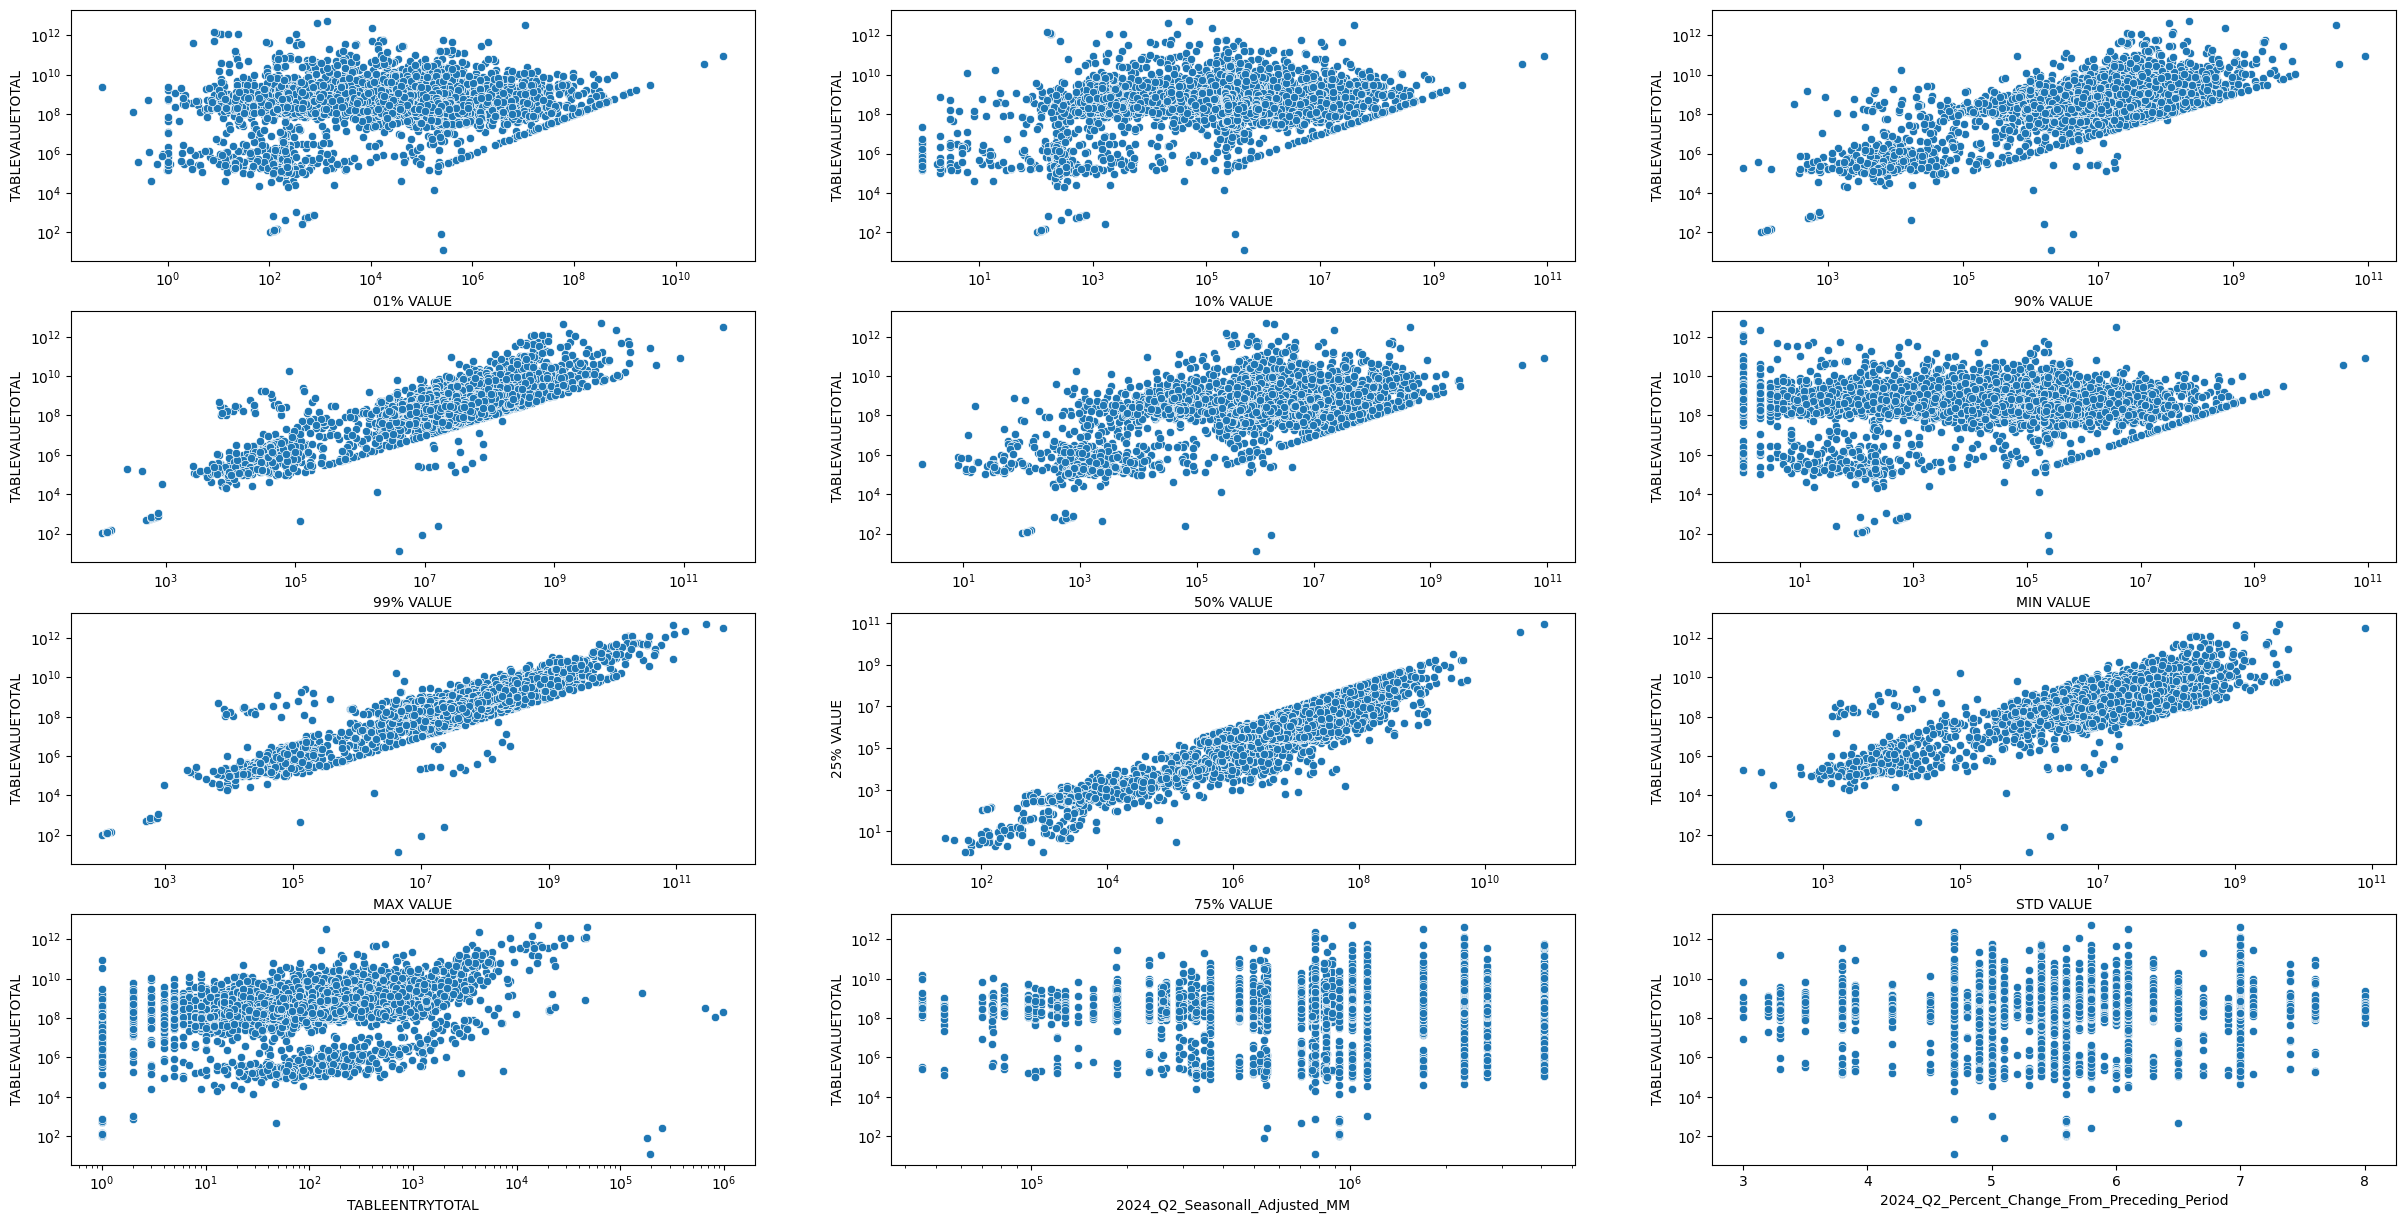

In [86]:
# fig, ax = plt.subplots(1,1,figsize=(6,3))
fig, ax = plt.subplots(4,3,figsize=(30,15))
a1 = ax[0,0]
a2 = ax[0,1]
a3 = ax[0,2]

a4 = ax[1,0]
a5 = ax[1,1]
a6 = ax[1,2]

a7 = ax[2,0]
a8 = ax[2,1]
a9 = ax[2,2]

a10 = ax[3,0]
a11 = ax[3,1]
a12 = ax[3,2]
# a1 = ax
sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '01% VALUE', ax = a1)
a1.set_xscale("log"), a1.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% VALUE', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% VALUE', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% VALUE', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% VALUE', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN VALUE', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX VALUE', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% VALUE', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD VALUE', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")

sns.scatterplot(data = df_star, x = 'TABLEENTRYTOTAL', y = 'TABLEVALUETOTAL', ax = a10)
a10.set_xscale("log"), a10.set_yscale("log")

sns.scatterplot(data = df_star, x = '2024_Q2_Seasonall_Adjusted_MM', y = 'TABLEVALUETOTAL', ax = a11)
a11.set_xscale("log"), a11.set_yscale("log")

sns.scatterplot(data = df_star, x = '2024_Q2_Percent_Change_From_Preceding_Period', y = 'TABLEVALUETOTAL', ax = a12)
# ax.set_xscale("log")
a12.set_yscale("log")


(None, None)

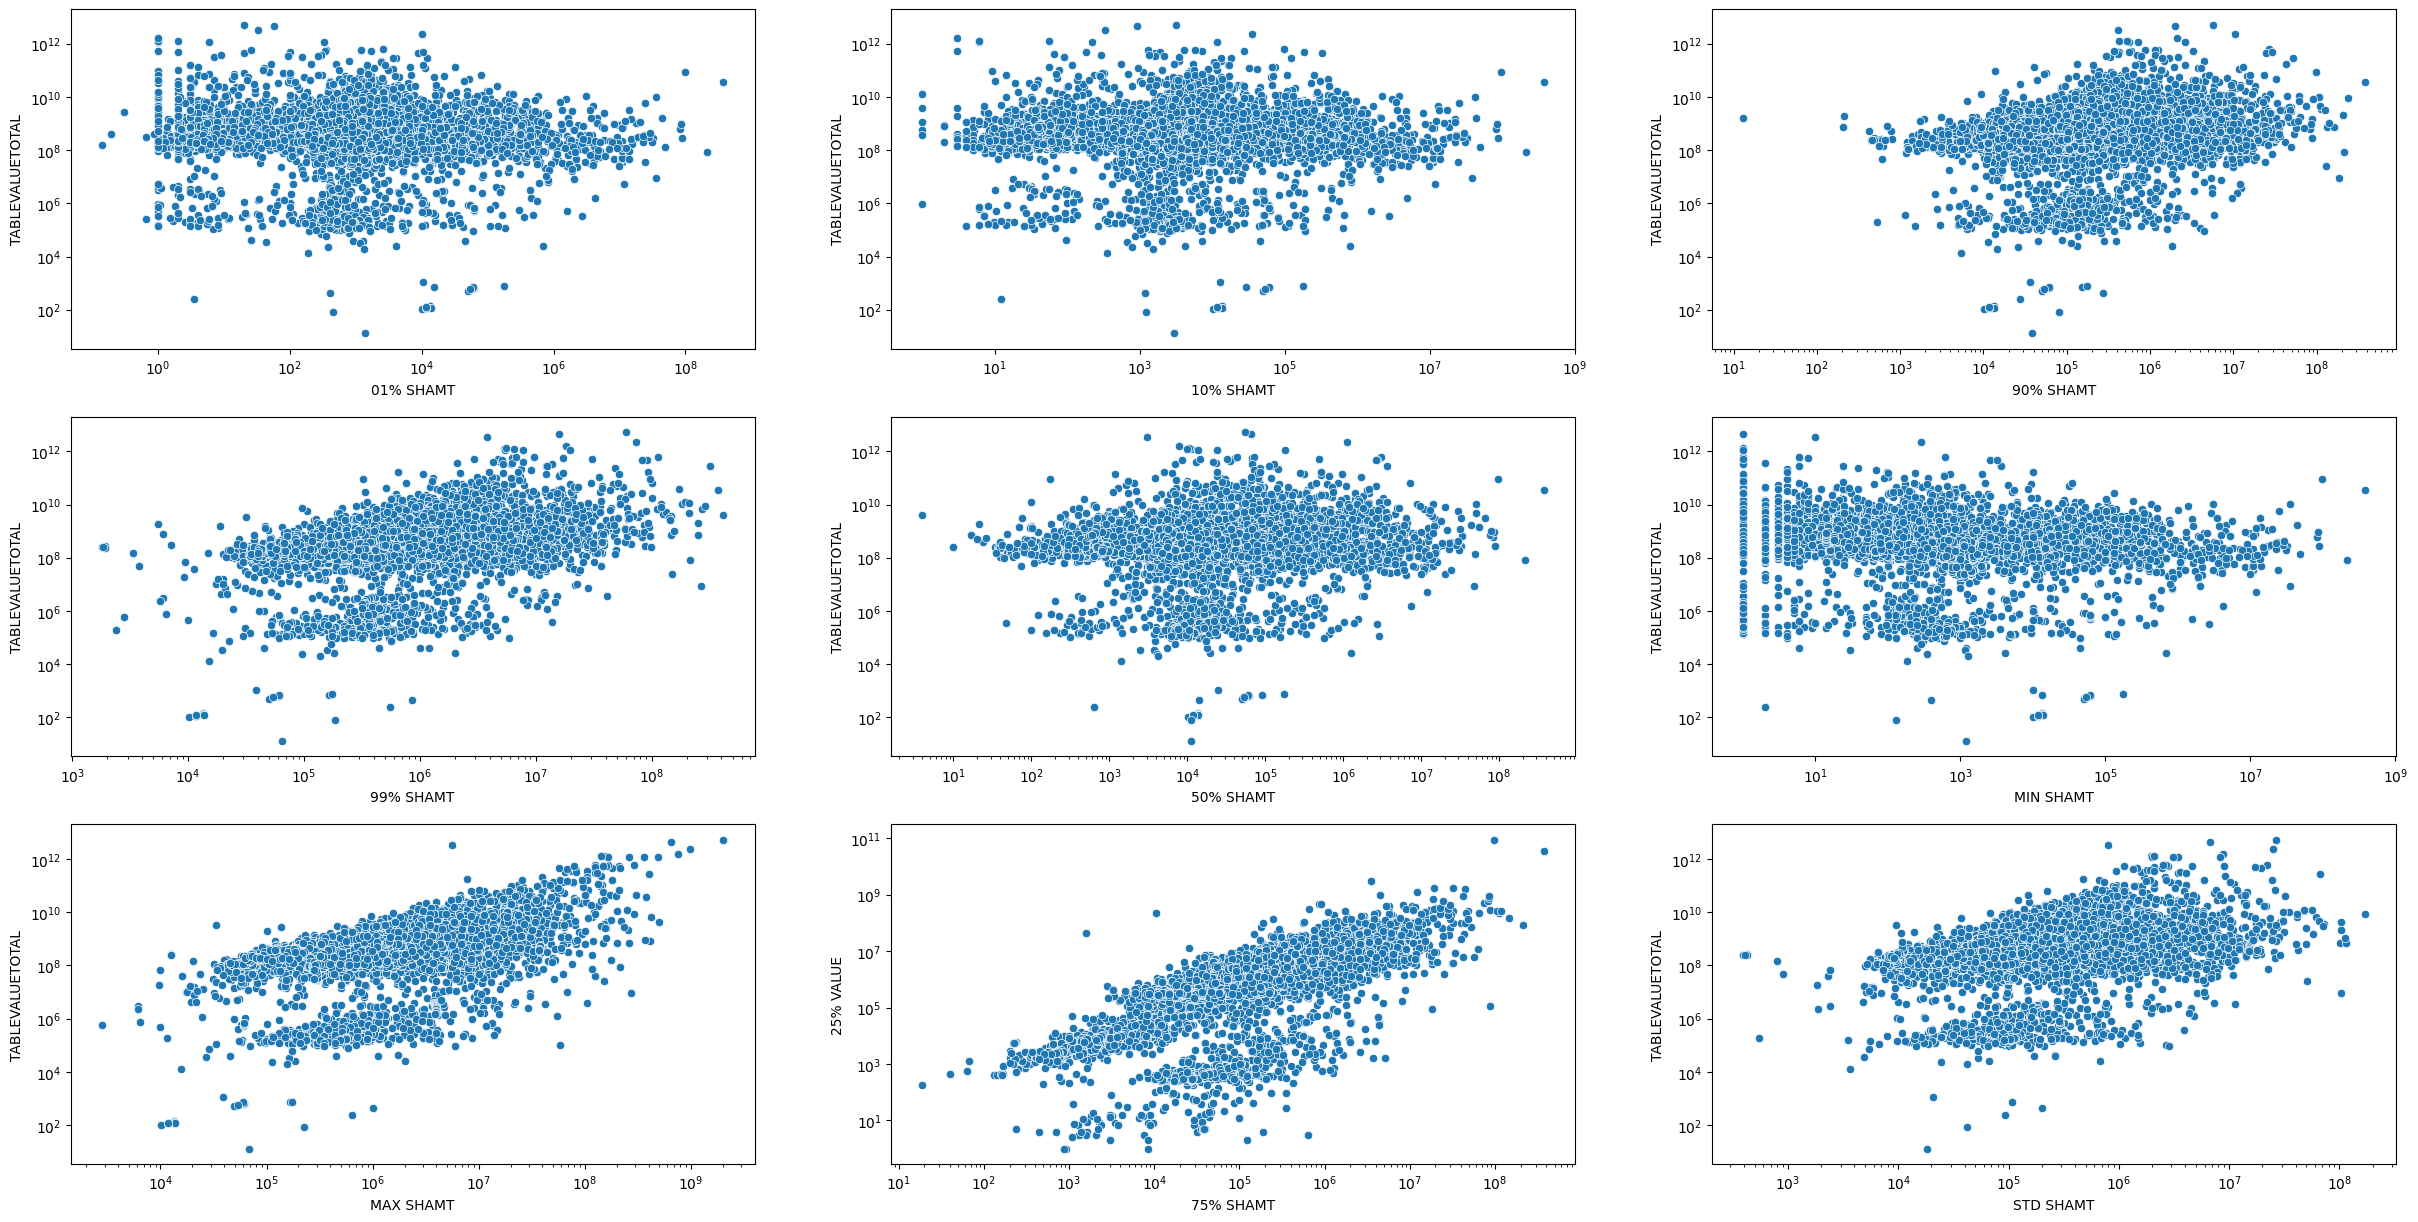

In [87]:
# fig, ax = plt.subplots(1,1,figsize=(6,3))
fig, ax = plt.subplots(3,3,figsize=(30,15))
a1 = ax[0,0]
a2 = ax[0,1]
a3 = ax[0,2]

a4 = ax[1,0]
a5 = ax[1,1]
a6 = ax[1,2]

a7 = ax[2,0]
a8 = ax[2,1]
a9 = ax[2,2]

# a10 = ax[3,0]
# a11 = ax[3,1]
# a12 = ax[3,2]
# a1 = ax
sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '01% SHAMT', ax = a1)
a1.set_xscale("log"), a1.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '10% SHAMT', ax = a2)
a2.set_xscale("log"), a2.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '90% SHAMT', ax = a3)
a3.set_xscale("log"), a3.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '99% SHAMT', ax = a4)
a4.set_xscale("log"), a4.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = '50% SHAMT', ax = a5)
a5.set_xscale("log"), a5.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MIN SHAMT', ax = a6)
a6.set_xscale("log"), a6.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'MAX SHAMT', ax = a7)
a7.set_xscale("log"), a7.set_yscale("log")

sns.scatterplot(data = df_star, y = '25% VALUE', x = '75% SHAMT', ax = a8)
a8.set_xscale("log"), a8.set_yscale("log")

sns.scatterplot(data = df_star, y = 'TABLEVALUETOTAL', x = 'STD SHAMT', ax = a9)
a9.set_xscale("log"), a9.set_yscale("log")


In [88]:
df_starlog.to_csv("../data/df_starlog.csv")

<Axes: >

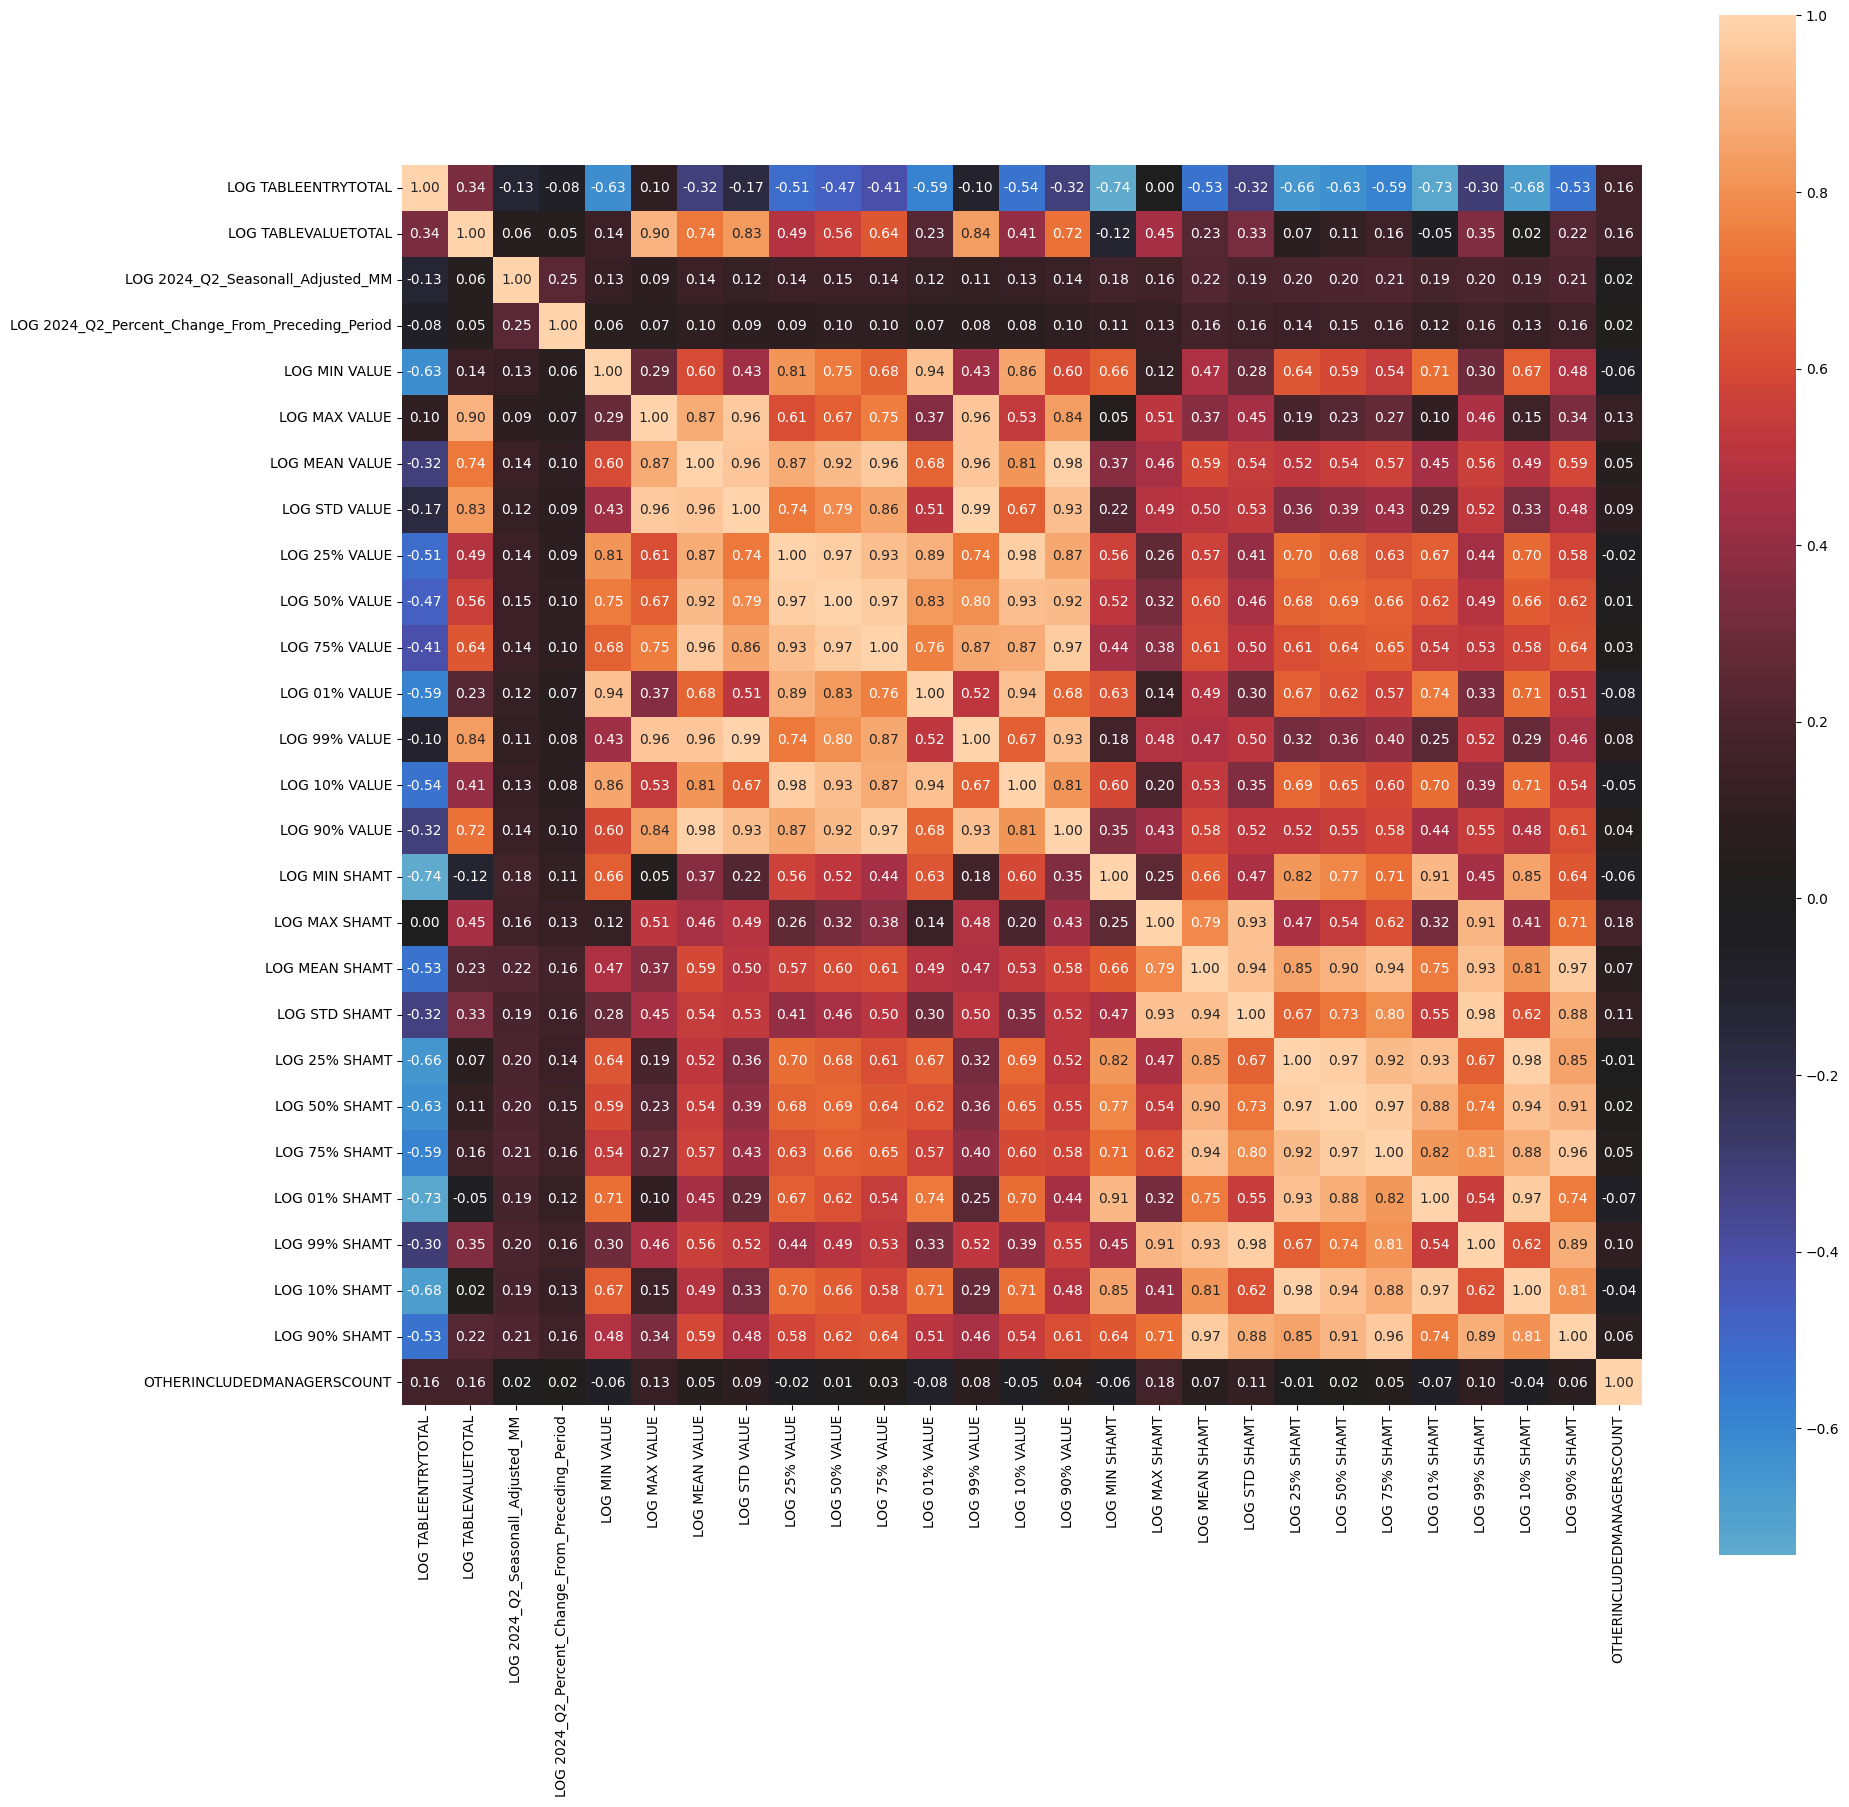

In [89]:
corr =  df_starlog.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, center=0, annot=True,fmt='.2f', square=True)

In [90]:
feature_subset = [
    'LOG MAX SHAMT',
    'LOG STD SHAMT',
    'LOG STD VALUE',
    'LOG MEAN VALUE',
    'LOG MAX VALUE',
    'LOG MIN VALUE'
]
X = df_starlog[feature_subset]
y = df_starlog['LOG TABLEVALUETOTAL']

In [91]:
len(df_starlog)

7051

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()